### Notebook used in the calculation of the grid percentages
Analysis on the intersections between grids and admin 3 boundaries

In [3]:
%load_ext jupyter_black

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [11]:
input_dir = Path(os.getenv("STORM_DATA_DIR")) / "analysis/02_new_model_input/input/"
input_dir

WindowsPath('G:/Shared drives/Predictive Analytics/Collaborations/ISI/data/analysis/02_new_model_input/input')

Creating centroids

In [2]:
# reading in the intersections file
intersections_area = pd.read_csv(input_dir / "phl_adm3_grid_intersections_area.csv")
adm3_area = pd.read_csv(input_dir / "adm3_area.csv")
intersections_area["Longitude"] = (intersections_area["left"] + intersections_area["right"])/2
intersections_area["Latitude"]  = (intersections_area["top"] + intersections_area["bottom"])/2
intersections_area["lon_symb"] = ["W" if x < 0 else "E" for x in intersections_area["Longitude"]]  
intersections_area["lat_symb"] = ["S" if y < 0 else "N" for y in intersections_area["Latitude"] ]  
intersections_area["Centroid"] = intersections_area["Longitude"].round(1).astype(str) + intersections_area["lon_symb"] + "_" + intersections_area["Latitude"].round(1).astype(str) + intersections_area["lat_symb"]


In [3]:
# getting unique grid values
grid_area = intersections_area.drop_duplicates(subset=['id'])
grid_area

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,...,Area_2,AreainKM_2,Len,Area_3,AreainKM_3,Longitude,Latitude,lon_symb,lat_symb,Centroid
0,1.601219,0.063496,Aborlan,PH175301000,NaN,NaN,NaN,Palawan,PH175300000,Region IV-B,...,1.213771e+08,121.377,11.01713,1.943497e+05,0.194350,118.3,9.7,E,N,118.3E_9.7N
1,1.601219,0.063496,Aborlan,PH175301000,NaN,NaN,NaN,Palawan,PH175300000,Region IV-B,...,1.214122e+08,121.412,11.01872,2.935790e+07,29.357902,118.3,9.6,E,N,118.3E_9.6N
2,1.601219,0.063496,Aborlan,PH175301000,NaN,NaN,NaN,Palawan,PH175300000,Region IV-B,...,1.214469e+08,121.447,11.02030,6.345611e+07,63.456111,118.3,9.5,E,N,118.3E_9.5N
3,1.601219,0.063496,Aborlan,PH175301000,NaN,NaN,NaN,Palawan,PH175300000,Region IV-B,...,1.214813e+08,121.481,11.02185,1.660439e+07,16.604394,118.3,9.4,E,N,118.3E_9.4N
4,1.601219,0.063496,Aborlan,PH175301000,NaN,NaN,NaN,Palawan,PH175300000,Region IV-B,...,1.213771e+08,121.377,11.01713,1.121499e+07,11.214986,118.4,9.7,E,N,118.4E_9.7N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,4.719512,0.122560,Zamboanga City,PH097332000,NaN,NaN,NaN,Zamboanga del Sur,PH097300000,Region IX,...,1.221975e+08,122.198,11.05430,1.507662e+07,15.076624,122.3,7.0,E,N,122.3E_7.0N
9856,4.719512,0.122560,Zamboanga City,PH097332000,NaN,NaN,NaN,Zamboanga del Sur,PH097300000,Region IX,...,1.222228e+08,122.223,11.05544,3.615211e+06,3.615211,122.3,6.9,E,N,122.3E_6.9N
9858,4.719512,0.122560,Zamboanga City,PH097332000,NaN,NaN,NaN,Zamboanga del Sur,PH097300000,Region IX,...,1.220926e+08,122.093,11.04955,1.896867e+07,18.968673,122.4,7.4,E,N,122.4E_7.4N
9859,4.719512,0.122560,Zamboanga City,PH097332000,NaN,NaN,NaN,Zamboanga del Sur,PH097300000,Region IX,...,1.221194e+08,122.119,11.05077,3.635641e+06,3.635641,122.4,7.3,E,N,122.4E_7.3N


In [4]:
# getting range of grid sizes
grid_area["AreainKM_2"].describe()

count    3724.000000
mean      120.457224
std         1.596235
min       115.037000
25%       119.477000
50%       120.848000
75%       121.835000
max       122.705000
Name: AreainKM_2, dtype: float64

In [5]:
# getting range of municipality sizes
adm3_area["AreainKM"].describe()

count    1647.000000
mean      178.203549
std       205.850889
min         0.399814
25%        59.475687
50%       112.122824
75%       217.178740
max      2341.427373
Name: AreainKM, dtype: float64

Text(0.5, 1.0, 'Municipality Sizes in Square KM')

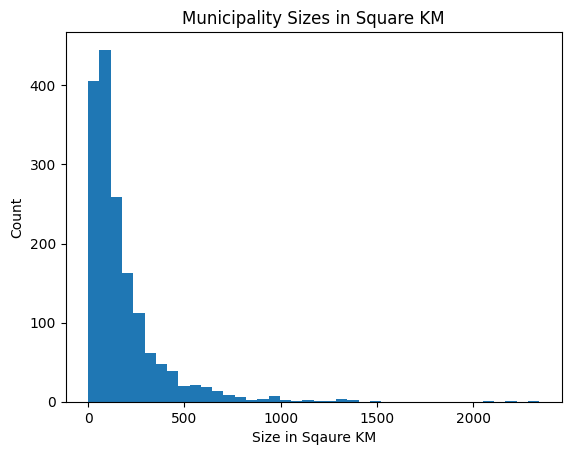

In [6]:
# histogram of municipality area
plt.hist(adm3_area["AreainKM"], bins = 40)
plt.xlabel("Size in Sqaure KM")
plt.ylabel("Count")
plt.title("Municipality Sizes in Square KM")


In [7]:
# proportion of municipalities smaller than 120 sq KM
len(adm3_area["AreainKM"][(adm3_area["AreainKM"] <= 120)])/len(adm3_area["AreainKM"])

0.5282331511839709

Around 52.8% of municipalities are smaller than 120 sqaure kilmetres.

In [8]:
# number of municipalities in a grid
municip_no = intersections_area.groupby("id")["ADM3_PCODE"].count()
municip_no.describe()

count    3724.000000
mean        2.652793
std         1.610140
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
Name: ADM3_PCODE, dtype: float64

Text(0.5, 1.0, 'Number of Municipalities in a Grid')

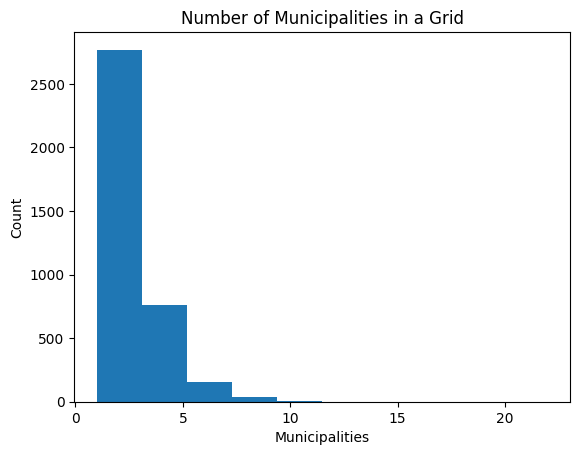

In [9]:
# histogram of number of municipalities in a grid
plt.hist(municip_no, bins = 10)
plt.xlabel("Municipalities")
plt.ylabel("Count")
plt.title("Number of Municipalities in a Grid")

In [10]:
intersections_area[intersections_area["id"] == 20556]

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,...,Area_2,AreainKM_2,Len,Area_3,AreainKM_3,Longitude,Latitude,lon_symb,lat_symb,Centroid
615,1.522956,0.072669,Baganga,PH112501000,NaN,NaN,NaN,Davao Oriental,PH112500000,Region XI,...,1.220926e+08,122.093,11.04955,1.396097e+06,1.396097,126.6,7.4,E,N,126.6E_7.4N
1959,1.117590,0.046750,Caraga,PH112504000,NaN,NaN,NaN,Davao Oriental,PH112500000,Region XI,...,1.220926e+08,122.093,11.04955,8.014208e+06,8.014208,126.6,7.4,E,N,126.6E_7.4N


In [11]:
# assigning grids to municipalities based on which one has the largest area
max_area_grid_assignment = intersections_area.sort_values("Area_3", ascending=False).groupby("id", as_index=False).first()
max_area_grid_assignment

,id,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,...,Area_2,AreainKM_2,Len,Area_3,AreainKM_3,Longitude,Latitude,lon_symb,lat_symb,Centroid
0,101,0.031076,0.000033,Kalayaan,PH175321000,None,NaN,NaN,Palawan,PH175300000,...,1.208480e+08,120.848,10.99309,3.998143e+05,0.399814,114.3,11.1,E,N,114.3E_11.1N
1,4449,3.946180,0.045866,Balabac,PH175304000,None,NaN,NaN,Palawan,PH175300000,...,1.219534e+08,121.953,11.04325,3.650838e+06,3.650838,116.9,7.9,E,N,116.9E_7.9N
2,4612,3.946180,0.045866,Balabac,PH175304000,None,NaN,NaN,Palawan,PH175300000,...,1.218655e+08,121.865,11.03927,7.056533e+05,0.705653,117.0,8.2,E,N,117.0E_8.2N
3,4613,3.946180,0.045866,Balabac,PH175304000,None,NaN,NaN,Palawan,PH175300000,...,1.218951e+08,121.895,11.04061,4.034015e+07,40.340154,117.0,8.1,E,N,117.0E_8.1N
4,4614,3.946180,0.045866,Balabac,PH175304000,None,NaN,NaN,Palawan,PH175300000,...,1.219244e+08,121.924,11.04194,1.006175e+08,100.617511,117.0,8.0,E,N,117.0E_8.0N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,20554,1.522956,0.072669,Baganga,PH112501000,None,NaN,NaN,Davao Oriental,PH112500000,...,1.220380e+08,122.038,11.04708,1.921121e+07,19.211211,126.6,7.6,E,N,126.6E_7.6N
3720,20555,1.522956,0.072669,Baganga,PH112501000,None,NaN,NaN,Davao Oriental,PH112500000,...,1.220655e+08,122.066,11.04833,5.462093e+07,54.620926,126.6,7.5,E,N,126.6E_7.5N
3721,20556,1.117590,0.046750,Caraga,PH112504000,None,NaN,NaN,Davao Oriental,PH112500000,...,1.220926e+08,122.093,11.04955,8.014208e+06,8.014208,126.6,7.4,E,N,126.6E_7.4N
3722,20557,1.117590,0.046750,Caraga,PH112504000,None,NaN,NaN,Davao Oriental,PH112500000,...,1.221194e+08,122.119,11.05077,2.302141e+07,23.021406,126.6,7.3,E,N,126.6E_7.3N


In [12]:
# assignment rate
len(max_area_grid_assignment["ADM3_PCODE"].unique())/len(intersections_area["ADM3_PCODE"].unique())

0.8092345078979344

Around 81% of municipalities are assigned to a grid, meaning around 19% do not contribute to grids.

In [17]:
# writing matching to file
max_assign_out = max_area_grid_assignment[["id", "Centroid", "ADM3_PCODE", "ADM3_EN"]]
max_assign_out.to_csv(input_dir / "Grid_Matching_Adm3_Max.csv", index=False)

In [24]:
# creating matrix with weights for each grid
intersections_area["Complete Grid"] = [1 if (y - x) <= 100 else 0 for (y,x) in zip(intersections_area["Area_2"], intersections_area["Area_3"])] 
intersections_area["Complete Grid"].describe()
intersections_area["Municipality Completeness"] = intersections_area["Area_3"] / intersections_area["Area"]
intersections_area["Grid Completeness"] = intersections_area["Area_3"] / intersections_area["Area_2"]
intersections_area[intersections_area["id"] == 11028]

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,...,Area_3,AreainKM_3,Longitude,Latitude,lon_symb,lat_symb,Centroid,Complete Grid,Municipality Completeness,Grid Completeness
66,0.328783,0.004081,Agoncillo,PH041001000,NaN,NaN,NaN,Batangas,PH041000000,Region IV-A,...,3.232797e+07,32.327969,120.9,14.0,E,N,120.9E_14.0N,0,0.662647,0.270463
1691,0.485431,0.009609,Calaca,PH041007000,NaN,NaN,NaN,Batangas,PH041000000,Region IV-A,...,1.378816e+07,13.788165,120.9,14.0,E,N,120.9E_14.0N,0,0.120043,0.115355
4792,0.423407,0.006191,Laurel,PH041011000,NaN,NaN,NaN,Batangas,PH041000000,Region IV-A,...,3.496995e+07,34.969946,120.9,14.0,E,N,120.9E_14.0N,0,0.472698,0.292567
4828,0.443342,0.006032,Lemery,PH041012000,NaN,NaN,NaN,Batangas,PH041000000,Region IV-A,...,3.611550e+07,36.115505,120.9,14.0,E,N,120.9E_14.0N,0,0.500827,0.302151


In [26]:
# writing to CSV files
intersections_area[["id", "Centroid", "ADM3_PCODE", "ADM3_EN", "Grid Completeness"]].to_csv(input_dir / "Adm3_Perc_inGrid_Weight_Matrix.csv", index=False)
intersections_area[["id", "Centroid", "ADM3_PCODE", "ADM3_EN", "Municipality Completeness"]].to_csv(input_dir / "Grid_Perc_inAdm3_Weight_Matrix.csv", index=False)
